## Импорты

In [ ]:
from typing import Any
from typing import Dict
from typing import List

import pickle

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

import tensorflow as tf

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

## Анализ и предварительная обработка данных

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/energy_task.csv")

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19626 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19569 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19654 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19644 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19651 non-null  float64
 15  T7           19681 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19613 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19569.000000,19735.000000,19735.000000,19735.000000,19654.000000,...,19613.000000,19735.000000,19651.000000,19732.000000,19539.000000,19607.000000,19634.000000,19735.000000,19725.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.416943,22.267611,39.242500,20.855335,39.023931,...,22.030801,42.936165,19.486594,41.553061,7.414858,755.521144,79.748120,4.039752,38.331128,3.760995
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.075261,2.006111,3.254576,2.042884,4.340201,...,1.955828,5.224361,2.015256,4.151421,5.316895,7.405769,14.900566,2.451221,11.792933,4.195248
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.890000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.900000,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.105556,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.145000,...,23.390000,46.536000,20.600000,44.343393,10.400000,760.950000,91.666667,5.500000,40.000000,6.570000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [ ]:
categorical_columns = ["date"]

numerical_columns = list(set(df.columns) - set(categorical_columns))

In [ ]:
df[categorical_columns] = df[categorical_columns].fillna("11-06-2016 17:00").astype(str)

# Дата, как категориальный признак, не имеет влияния на датасет
# Также дата плохо поддаётся кодированию
# Поэтому столбец с этими данными можно удалить

In [ ]:
df = df.drop("date", axis=1)

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

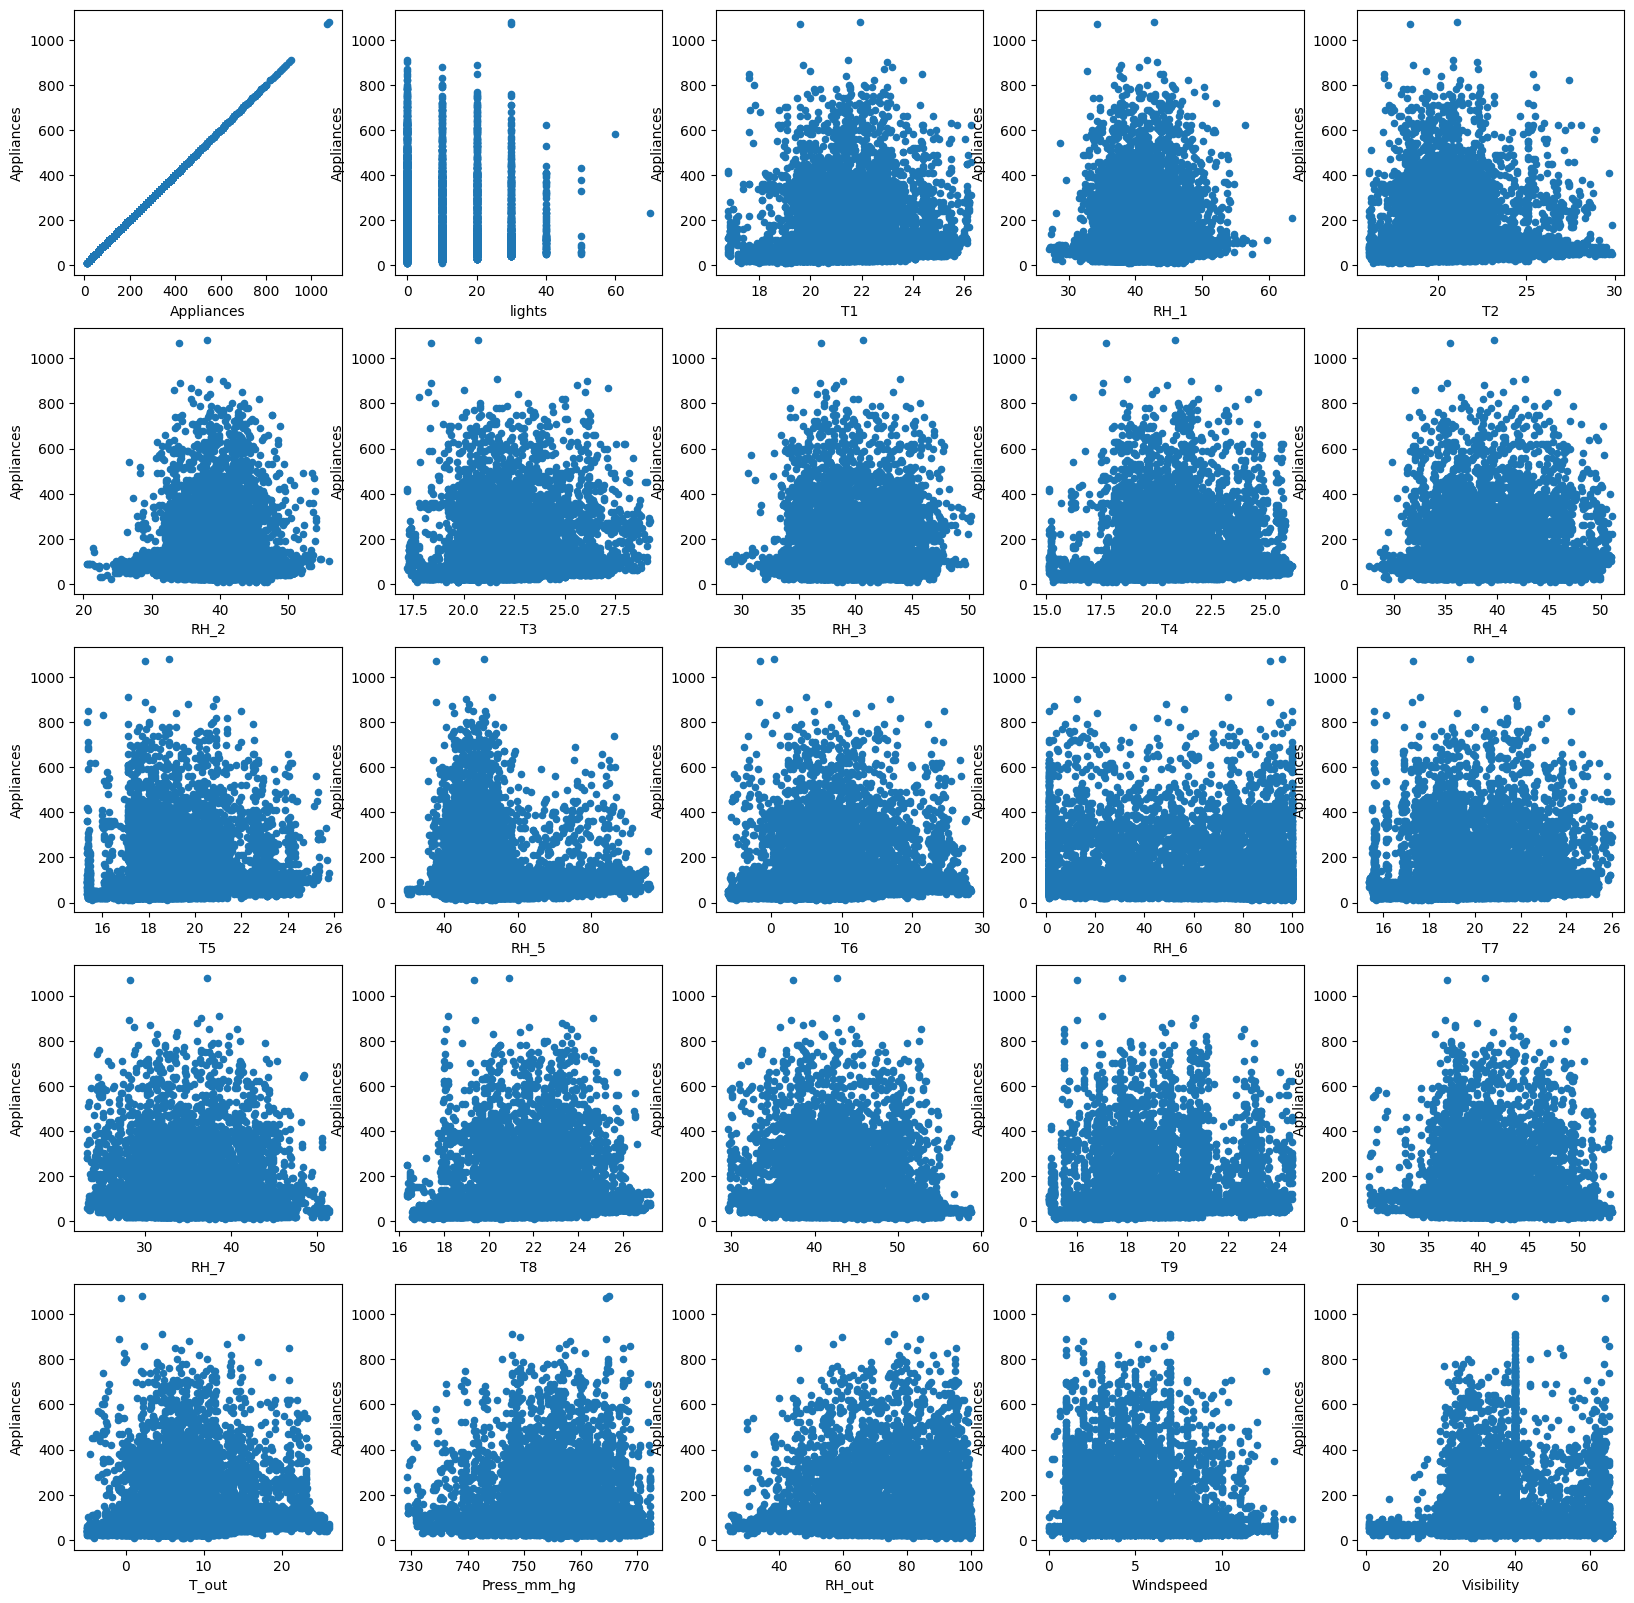

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "Appliances", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

In [ ]:
for column in df.columns:
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
df.to_csv("updated_df.csv")

## Моделирование (Обучение и оценивание моделей)

In [ ]:
def optimizer(X, y, estimator, params) -> None:
    X_train, X_test = train_test_split(X, train_size=0.3, random_state=42)
    y_train, y_test = train_test_split(y, train_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    model = GridSearchCV(estimator, params).fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print("[+] Model:", estimator)
    print("[+] Best params:", model.best_params_)
    print("[+] MSE:", mean_squared_error(y_test, y_pred))
    print("[+] MAE:", mean_absolute_error(y_test, y_pred))
    print("[+] MAPE:", mean_absolute_percentage_error(y_test, y_pred))
    print("[+] R2-Score:", r2_score(y_test, y_pred))

In [ ]:
X = df.drop(["Appliances"], axis=1).values
y = df["Appliances"].values

In [ ]:
X_train, X_test = train_test_split(X, train_size=0.3, random_state=42)
y_train, y_test = train_test_split(y, train_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
optimizer(X, y, Lasso(), {"alpha": [0.25, 0.5, 0.75, 1]})

[+] Model: Lasso()
[+] Best params: {'alpha': 0.25}
[+] MSE: 9090.869723404712
[+] MAE: 52.54164965151225
[+] MAPE: 0.5878718838819744
[+] R2-Score: 0.15352976254082562


In [ ]:
optimizer(X, y, Ridge(), {"alpha": [0.25, 0.5, 0.75, 1]})

[+] Model: Ridge()
[+] Best params: {'alpha': 1}
[+] MSE: 9079.606122582683
[+] MAE: 52.689298607219904
[+] MAPE: 0.5895322255860801
[+] R2-Score: 0.15457854039735142


In [ ]:
optimizer(X, y, DecisionTreeRegressor(), {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": [3, 5, 10, 20],
})

[+] Model: DecisionTreeRegressor()
[+] Best params: {'criterion': 'poisson', 'max_depth': 3, 'splitter': 'best'}
[+] MSE: 9908.477656916111
[+] MAE: 56.15231111783969
[+] MAPE: 0.6384304338946278
[+] R2-Score: 0.07740054688986142


In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

optimizer(X, y, BaggingRegressor(), {
    "estimator": [Lasso(), Ridge()],
    "n_estimators": [3, 5, 10, 20],
    "max_samples": [3, 5, 10, 20],
})

[+] Model: BaggingRegressor()
[+] Best params: {'estimator': Ridge(), 'max_samples': 20, 'n_estimators': 20}
[+] MSE: 10317.245388427724
[+] MAE: 59.113887669793
[+] MAPE: 0.7127482827263725
[+] R2-Score: 0.039339313005113286


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(25,)),
    tf.keras.layers.Dense(32, activation="linear"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation="linear"),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse")
model.fit(X_train_scaled, y_train, epochs=10, verbose=None)

y_pred = model.predict(X_test_scaled, verbose=None)

print("[+] MSE:", mean_squared_error(y_test, y_pred))
print("[+] MAE:", mean_absolute_error(y_test, y_pred))
print("[+] MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("[+] R2-Score:", r2_score(y_test, y_pred))

[+] MSE: 8660.256018948998
[+] MAE: 50.32169553961738
[+] MAPE: 0.5545746528094057
[+] R2-Score: 0.19362512148380795


In [ ]:
model = BaggingRegressor(estimator=Ridge(), max_samples=20, n_estimators=20)
model = model.fit(X_train_scaled, y_train)

filename = "/content/drive/My Drive/model.pkl"
with open(filename, "wb") as f:
    pickle.dump(model, f)

## Дашборд

[Ссылка на приложение](https://gitlab.com/kurpenok/OmSTU/-/tree/main/4%20semester/Machine%20learning/CGW)